## MAE290B, Homework Assigment 4
## Cesar B. Rocha (<crocha@ucsd.edu>)
### Winter 2015

In [2]:
from __future__ import division
import numpy as np
from numpy import sqrt,pi,cos,sin
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("paper", font_scale=3., rc={"lines.linewidth": 1.5})
sns.set_style("darkgrid",{'grid_color':.95})

## Problem 1: Modified wavenumber

In [3]:
kdx = np.linspace(1.e-14,pi,100)
kprimedx2 =  4*sin(kdx/2)**2

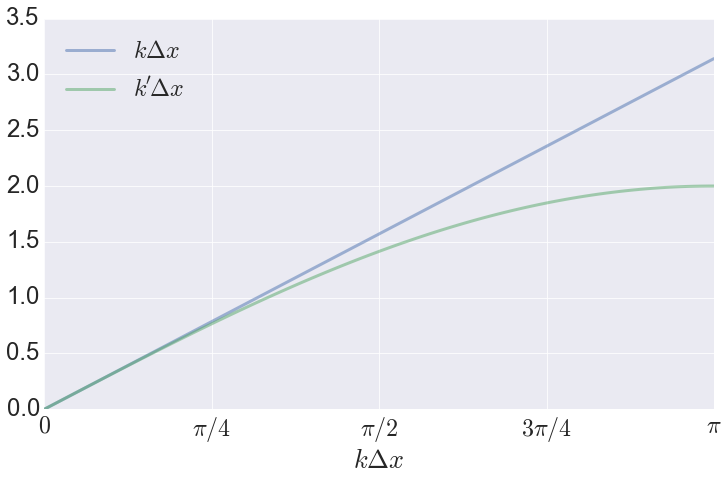

In [4]:
fig = plt.figure(figsize=(12,7))
plt.plot(kdx,kdx,linewidth=3,alpha=.5,label=r"$k\Delta x$")
plt.plot(kdx,sqrt(kprimedx2),linewidth=3,alpha=.5,label=r"$k'\Delta x$")
plt.xticks([0,pi/4,pi/2,3*pi/4,pi],[r'$0$',r'$\pi/4$',r'$\pi/2$',\
                                    r'$3\pi/4$',r'$\pi$'])
plt.xlim(0,pi)
plt.xlabel(r'$k\Delta x$')
plt.legend(loc=2)
plt.savefig('modified_wavenumber_diff')

## Problem 2 Laplace's equation

In [5]:
from numpy import log,ceil

In [6]:
M = 33 # total number of points in each direction
       # note that there are 32 intervals and 31 interior points

### Maximum eigenvalue of the GS matrix and the required number of iterations

In [7]:
lam_max = cos(pi/(M-2))**2
lam_max

0.98976497062624724

In [8]:
N = int(ceil(-2/log(lam_max)))
print "Required number of iterations to reduce the error by 100 is %i" %N

Required number of iterations to reduce the error by 100 is 195


 ####Create the initial condition given wanumber

In [29]:
def phi_initial(X,Y,kx=1/2,ky=1/2):
    phi0 = np.zeros(X.shape)  # BC's: zero temperature along the boundaries
    phi0[1:-1,1:-1] = sin(2*pi*kx*X[1:-1,1:-1])+sin(2*pi*ky*Y[1:-1,1:-1])
    return phi0

In [10]:
# The domain
x,y = np.linspace(0,1.,M),np.linspace(0,1.,M)
X,Y = np.meshgrid(x,y)

#### The Gauss-Seidel for Laplace's equation

In [428]:
def laplace_gs(phi_0,Nmax=100000,tol=1.e-14):
    
    """ 
         Solve Laplace's sequation subject to Dirichlet boundary condtion 
             using a GS iterative scheme
         
         Input
         -------------------------------------------------
             phi_0 :: 2D array with initial condition
                      (must contain boundary conditions)
         -------------------------------------------------    
         
         Parameters
         -------------------------------------------------
             Nmax :: maximum number of iterations
             tol  :: error tolerance (error defined as the
                         maximum absolute error)
         -------------------------------------------------
         
         Output
         -------------------------------------------------
            phi_new :: 2D array with steady state solution
         -------------------------------------------------      
     
    """   
    
    phi_new = phi_0.copy() 
    error = np.max(np.abs(phi_new))

    for nit in range(Nmax):
    
        for i in range(1,M-1):
    
            for j in range(1,M-1):
        
                phi_old = phi_new.copy()
        
                phi_new[i,j] = .25*( phi_new[i-1,j]+phi_old[i+1,j]+\
                                        phi_new[i,j-1]+phi_old[i,j+1] )

        error = np.append(error,np.max(np.abs(phi_new)))
        if error[-1] < tol: break
        
    print "Converged after %i iterations within %1.e error tolerance" %(nit+1,tol)
             
    return phi_new,error

In [243]:
phi0 = phi_initial(X,Y,kx=1/2,ky=1/2)
%timeit phif,errors = laplace_gs(phi0,Nmax=100000,tol=1.e-14)

Converged after 2461 iterations within 1e-14 error tolerance
Converged after 2461 iterations within 1e-14 error tolerance
Converged after 2461 iterations within 1e-14 error tolerance
Converged after 2461 iterations within 1e-14 error tolerance
1 loops, best of 3: 4.26 s per loop


In [244]:
phi0 = phi_initial(X,Y,kx=1/2,ky=1/2)
%timeit phif,errors = laplace_gs(phi0,tol=1.e-14)

Converged after 2461 iterations within 1e-14 error tolerance
Converged after 2461 iterations within 1e-14 error tolerance
Converged after 2461 iterations within 1e-14 error tolerance
Converged after 2461 iterations within 1e-14 error tolerance
1 loops, best of 3: 4.28 s per loop


In [376]:
from numba import double
from numba.decorators import jit, autojit
laplace_numba = autojit(laplace_gs)

### (b) Solve with initial guess: $\phi(t=0) =\sin \pi x + \sin \pi y$

In [429]:
phi0b = phi_initial(X,Y,kx=1/2,ky=1/2)
phib,errorb = laplace_gs(phi0b,Nmax=100000,tol=1.e-14)

Converged after 3437 iterations within 1e-14 error tolerance


### (c) Solve with initial guess: $\phi(t=0) =\sin 8\pi x + \sin 8\pi y$

In [430]:
phi0c = phi_initial(X,Y,kx=4,ky=4)
phic,errorc = laplace_gs(phi0c,Nmax=100000,tol=1.e-14)

Converged after 2934 iterations within 1e-14 error tolerance


In [379]:
def find_nearest(x,x0):
    """ Find the data point closest to x0 in the 
            array x 
                     
         Input
         -------------------------------------------------
            x  :: 1D array 
            x0 :: scalar 
         -------------------------------------------------  
         
          Output
         -------------------------------------------------
             x[imin] :: value closest to x0
             imin    :: array index of closes value
         -------------------------------------------------          
         """
    
    imin = np.abs(x-x0).argmin()
    return x[imin],imin

In [380]:
errorc_min,iminc = find_nearest(errorc/errorc[0],1.e-2)
print iminc

errorb_min,iminb = find_nearest(errorb/errorb[0],1.e-2)
print iminb

37
502


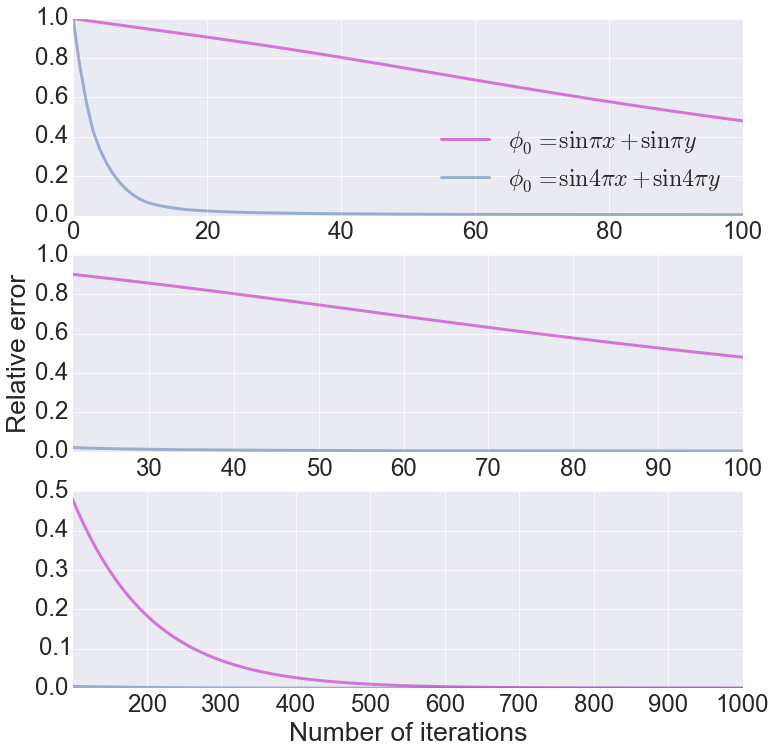

In [427]:
lw,aph = 3.,.5

fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(3,1,1)
ax1.plot(errorb/errorb[0],color='m',linewidth=lw,alpha=aph,label=r'$\phi_0 = \sin \pi x + \sin \pi y$')
ax1.plot(errorc/errorc[0],linewidth=lw,alpha=aph,label=r'$\phi_0 = \sin 4\pi x + \sin 4 \pi y$')
ax1.set_xlim(0,100)
ax1.set_ylim(0,1.)
ax1.legend(loc=4)

ax2 = fig.add_subplot(3,1,2)
ax2.plot(errorb/errorb[0],color='m',linewidth=lw,alpha=aph)
ax2.plot(errorc/errorc[0],linewidth=lw,alpha=aph)
ax2.set_xlim(21,100)
ax2.set_ylim(0,1.)
ax2.set_ylabel('Relative error')

ax3 = fig.add_subplot(3,1,3)
ax3.plot(errorb/errorb[0],color='m',linewidth=lw,alpha=aph)
ax3.plot(errorc/errorc[0],linewidth=lw,alpha=aph)
ax3.set_xlim(101,1000)
ax3.set_ylim(0,.5)
ax3.set_xlabel('Number of iterations')

plt.savefig('error_it')

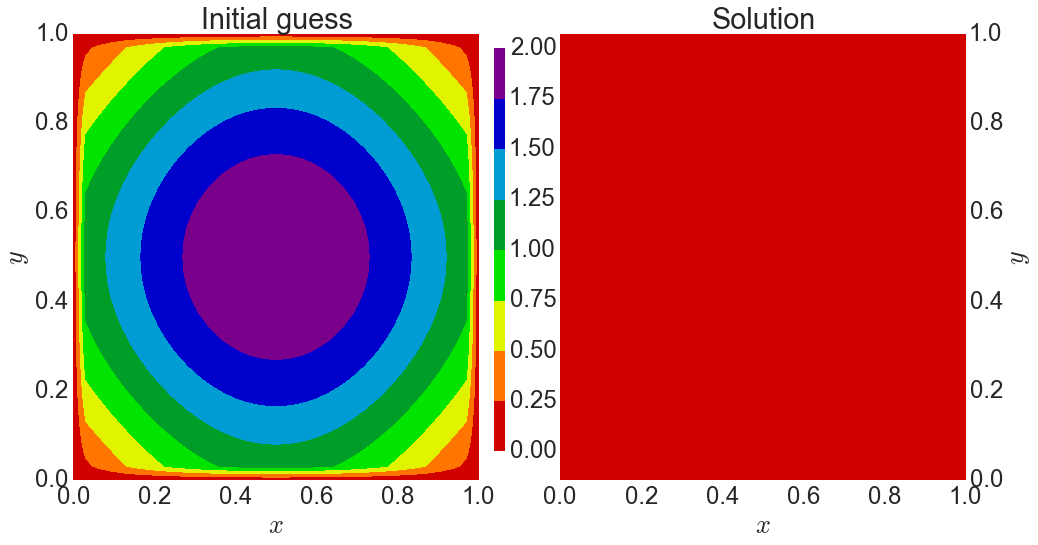

In [426]:
cl = np.linspace(0,2,9)

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax1.contourf(x,y,phi0b,cl,cmap='spectral_r')
ax1.set_title(r"Initial guess")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")

ax2 = fig.add_subplot(1,2,2)
im = ax2.contourf(x,y,phib,cl,cmap='spectral_r')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_title(r"Solution")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$y$")

cbaxes = fig.add_axes([.49, 0.175, .01, 0.7]) 
cb = plt.colorbar(im, cax = cbaxes)
plt.savefig('sin_half')

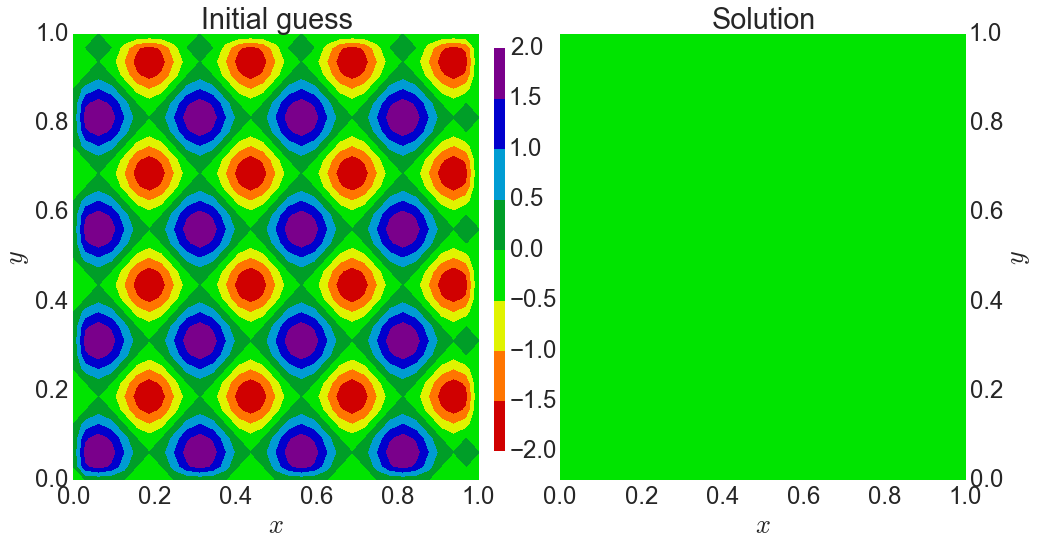

In [422]:
cl = np.linspace(-2,2,9)

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax1.contourf(x,y,phi0c,cl,cmap='spectral_r')
ax1.set_title(r"Initial guess")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
ax2 = fig.add_subplot(1,2,2)
im = ax2.contourf(x,y,phic,cl,cmap='spectral_r')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_title(r"Solution")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$y$")

cbaxes = fig.add_axes([.49, 0.175, .01, 0.7]) 
cb = plt.colorbar(im, cax = cbaxes)
plt.savefig('sin_four')